### Treść zadania

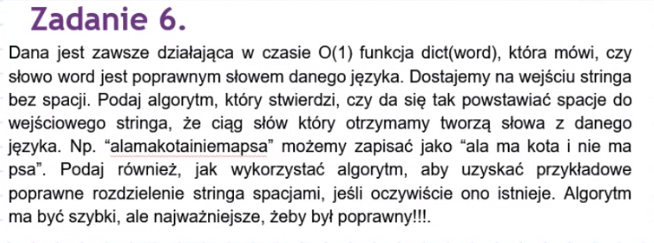

### Omówienie algorytmu

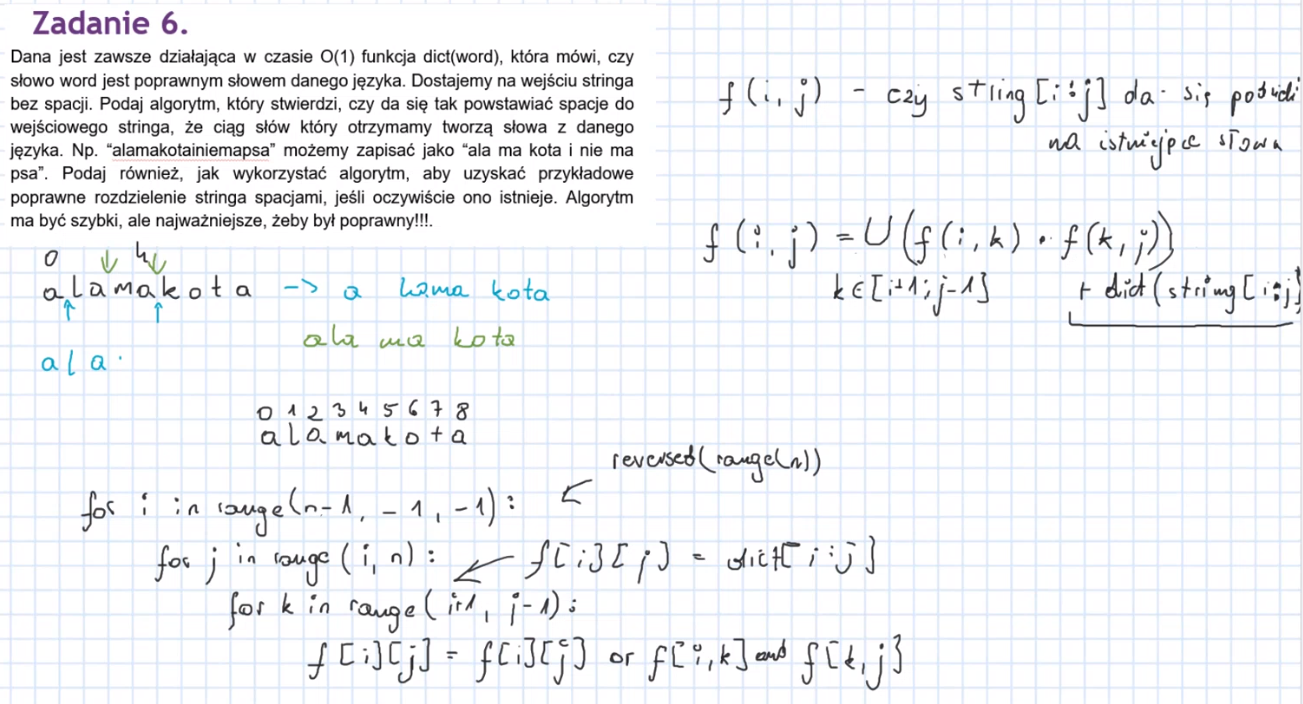

### Złożoność

###### Obliczeniowa
$ O(n^3) $ <br>
Złożoność jest taka, ponieważ albo idziemy dwiema pętlami i sprawdzamy, przy pomocy slicingu, czy słowo od $ i $. indeksu do $ j $. włącznie jest prawidłowym słowem (wycinanie trwa $ O(n) $, ale złożoność dwóch pętli to $ O(n^2) $, więc mamy $ O(n^3) $), albo w trzeciej pętli przechodzimy wskaźnikiem $ k $ między $ i $ a $ j $, sprawdzając, czy fragment $ i - j $ da się podzielić na dwa fragmenty, które składają się z prawidłowych słów, co ma złożoność $ O(n) $, ale znów mamy $ 2 $ zewnętrzne pętle, stąd $ O(n^3) $. Finalnie otrzymujemy $ O(n^3 + n^3) = O(n^3) $.

### Implementacja

#### Funkcja do sprawdzania prawidłowości słów

Tworzenie słownika trwa kilka sekund 😉. Zakładamy, że wielkość liter nie ma znaczenia. Ponieważ mnogość różnych wyrazów oraz form skrótowych w tej bazie słów jest zbyt duża, zaimplementujemy jeszcze uproszczoną wersję funkcji tak, aby otrzymać pożądany rezultat.

In [1]:
def create_dict(path=r'./data/zadanie6/odm.txt'):
    dct = set()
    with open(path, mode='r', encoding='utf8') as f:
        for line in f:
            for word in line.strip().split(','):
                word = word.lower().strip()
                dct.add(word)
    return dct


def in_dict_init(path=None):
    dct = create_dict(path) if path else create_dict()
    
    to_remove = (
        *'qąbcćdeęfghjklłmnóprsśtyźż',
        'ff', 'fff', 'fn', 'ic', 'ica', 'nica', 'in', 'inie',
        'si', 'nu', 'sko', 'sd', 'jw', 'ain', 'map', 'sa', 'ie', 'niema', 'ot', 'ai',
        'tainie', 'tai'
    )
    
    for word in to_remove: dct.remove(word)
    
    def in_dict(word: str) -> bool:
        return word.lower() in dct
    
    return in_dict

in_dict = in_dict_init()

def in_dict_init2(dct):
    def in_dict2(word):
        return word.lower() in dct
    return in_dict2
    
in_dict2 = in_dict_init2({'ala', 'ma', 'kota', 'i', 'nie', 'psa'})

#### Implementacja właściwego algorytmu

#### Bottom-up

In [2]:
def is_valid_sentence(string: str) -> bool:
    n = len(string)
    F = [[False] * n for _ in range(n)]    

    # Fill the diagonal as it corresponds to the i-i 1-element substrings
    for i in range(n):
        F[i][i] = in_dict2(string[i])
        
    # Start filling the top-right triangle (the bottom-left one will be
    # empty as there are no substrings with i > j, where i is an index of
    # its beginning and j an index of its end (last element inclusive))
    for t in range(1, n):
        for i in range(n - t):
            j = i + t
            
            if in_dict(string[i:j+1]):
                F[i][j] = True
            else:
                for k in range(i, j):
                    F[i][j] = F[i][k] and F[k + 1][j]
                    if F[i][j]: break
        
#     print(*F, sep='\n')
    
    return F[0][n - 1]

###### Kilka testów

In [3]:
print(is_valid_sentence('alamakotainiemapsa'))

True


### Odtwarzanie rozwiązania (wstawianie spacji)

#### Bottom-up

Konieczna jest modyfikacja powyższego algorytmu tak, aby dla danego ciągu tekstowego zapamiętany został punkt podziału (indeks, na którym należy wstawić spację).

In [4]:
def to_valid_sentence(string: str, *, dct_fn=in_dict2) -> bool:
    n = len(string)
    # Store the beginning index if no split was made, else store an index
    # next to the split index, else store -1 if cannot split to valid words
    F = [[-1] * n for _ in range(n)]

    # Fill the diagonal as it corresponds to the i-i 1-element substrings
    for i in range(n):
        if in_dict(string[i]):
            F[i][i] = 0
        
    # Start filling the top-right triangle (the bottom-left one will be
    # empty as there are no substrings with i > j, where i is an index of
    # its beginning and j an index of its end (last element inclusive))
    for t in range(1, n):
        for i in range(n - t):
            j = i + t
            
            if dct_fn(string[i:j+1]):
                F[i][j] = i
            else:
                for k in range(i, j):
                    # If can split a substring into two valid substrings which will form
                    # sentences and there was no previous split made (F[i][j] < 0) or the
                    # current split will give us a longer word (F[i][k] == i means we take
                    # the whole word from the previous split), assign k + 1 as a split index
                    # of the current substring
                    if F[i][k] >= 0 and F[k + 1][j] >= 0 and (F[i][j] < 0 or F[i][k] == i):
                        F[i][j] = k + 1
        
#     print(*F, sep='\n')
    return get_solution(F, string)


def get_solution(F, string):
    n = len(F)
    if F[0][n - 1] < 0: return ''
    
    stack = [(F[0][n - 1], n - 1), (0, F[0][n - 1] - 1)]
    res = []
    while stack:
        i, j = stack.pop()
        if F[i][j] > i:
            stack.append((F[i][j], j))
            stack.append((i, F[i][j] - 1))
        else:
            res.append(string[i:j+1])
    
    return ' '.join(res)

###### Kilka testów

In [5]:
print(to_valid_sentence('alamakotainiemapsa', dct_fn=in_dict))
print(to_valid_sentence('alamakotainiemapsa', dct_fn=in_dict2))
print(to_valid_sentence('óp', dct_fn=in_dict))
print(to_valid_sentence('lubięplacki', dct_fn=in_dict))
print(to_valid_sentence('kochamprogramować', dct_fn=in_dict))
print(to_valid_sentence('sinuskosinusdajwacektrzyminus', dct_fn=in_dict))
print(to_valid_sentence('ujebiewaswszystkich', dct_fn=in_dict))

ala mak o ta i nie ma psa
ala ma kota i nie ma psa

lubię placki
kocham programować
sinus kosinus daj wacek trzy minus
ujebie was wszystkich


##### Troubleshooting

In [6]:
def is_valid_sentence(string: str) -> bool:
    n = len(string)
    F = [[False] * n for _ in range(n)]
    
    P = [[''] * n for _ in range(n)]
    
    # Fill the diagonal as it corresponds to the i-i 1-element substrings
    for i in range(n):
        F[i][i] = in_dict(string[i])
        
        if F[i][i]:
            P[i][i] = string[i]
        print(string[i], in_dict(string[i]))
        
    # Start filling the top-right triangle (the bottom-left one will be
    # empty as there are no substrings with i > j, where i is an index of
    # its beginning and j an index of its end (last element inclusive))
    for t in range(1, n):
        for i in range(n - t):
            j = i + t
            
            if in_dict(string[i:j+1]):
                F[i][j] = True
                
                P[i][j] = string[i:j+1]
                print(string[i:j+1], f"   F[{i}][{j}] = {F[i][j]}")
            else:
                for k in range(i, j):
                    print(f'\tChecking F[{i}][{k}] and F[{k + 1}][{j}]')
                    F[i][j] = F[i][k] and F[k + 1][j]
                    print(string[i:k+1], string[k+1:j+1], f"   F[{i}][{j}] = {F[i][j]}")
                    if F[i][j]: 
                        P[i][j] = f"{P[i][k]} {P[k + 1][j]}"
                        break
        
    print(*F, sep='\n')
    print()
    print(*P, sep='\n')

###### Kilka testów

In [7]:
print(is_valid_sentence('dżdżoffffffnica'))

d False
ż False
d False
ż False
o True
f False
f False
f False
f False
f False
f False
n False
i True
c False
a True
dż    F[0][1] = True
	Checking F[1][1] and F[2][2]
ż d    F[1][2] = False
dż    F[2][3] = True
	Checking F[3][3] and F[4][4]
ż o    F[3][4] = False
	Checking F[4][4] and F[5][5]
o f    F[4][5] = False
	Checking F[5][5] and F[6][6]
f f    F[5][6] = False
	Checking F[6][6] and F[7][7]
f f    F[6][7] = False
	Checking F[7][7] and F[8][8]
f f    F[7][8] = False
	Checking F[8][8] and F[9][9]
f f    F[8][9] = False
	Checking F[9][9] and F[10][10]
f f    F[9][10] = False
	Checking F[10][10] and F[11][11]
f n    F[10][11] = False
ni    F[11][12] = True
	Checking F[12][12] and F[13][13]
i c    F[12][13] = False
ca    F[13][14] = True
	Checking F[0][0] and F[1][2]
d żd    F[0][2] = False
	Checking F[0][1] and F[2][2]
dż d    F[0][2] = False
	Checking F[1][1] and F[2][3]
ż dż    F[1][3] = False
	Checking F[1][2] and F[3][3]
żd ż    F[1][3] = False
	Checking F[2][2] and F[3][4]
d żo

żdżoffff ff    F[1][10] = False
	Checking F[1][9] and F[10][10]
żdżofffff f    F[1][10] = False
	Checking F[2][2] and F[3][11]
d żoffffffn    F[2][11] = False
	Checking F[2][3] and F[4][11]
dż offffffn    F[2][11] = False
	Checking F[2][4] and F[5][11]
dżo ffffffn    F[2][11] = False
	Checking F[2][5] and F[6][11]
dżof fffffn    F[2][11] = False
	Checking F[2][6] and F[7][11]
dżoff ffffn    F[2][11] = False
	Checking F[2][7] and F[8][11]
dżofff fffn    F[2][11] = False
	Checking F[2][8] and F[9][11]
dżoffff ffn    F[2][11] = False
	Checking F[2][9] and F[10][11]
dżofffff fn    F[2][11] = False
	Checking F[2][10] and F[11][11]
dżoffffff n    F[2][11] = False
	Checking F[3][3] and F[4][12]
ż offffffni    F[3][12] = False
	Checking F[3][4] and F[5][12]
żo ffffffni    F[3][12] = False
	Checking F[3][5] and F[6][12]
żof fffffni    F[3][12] = False
	Checking F[3][6] and F[7][12]
żoff ffffni    F[3][12] = False
	Checking F[3][7] and F[8][12]
żofff fffni    F[3][12] = False
	Checking F[3][8] a

In [8]:
in_dict('niema')

False

In [10]:
print(is_valid_sentence('alamakotainiemapsa'))

a True
l False
a True
m False
a True
k False
o True
t False
a True
i True
n False
i True
e False
m False
a True
p False
s False
a True
al    F[0][1] = True
la    F[1][2] = True
am    F[2][3] = True
ma    F[3][4] = True
ak    F[4][5] = True
ko    F[5][6] = True
	Checking F[6][6] and F[7][7]
o t    F[6][7] = False
ta    F[7][8] = True
	Checking F[8][8] and F[9][9]
a i    F[8][9] = True
	Checking F[9][9] and F[10][10]
i n    F[9][10] = False
ni    F[10][11] = True
	Checking F[11][11] and F[12][12]
i e    F[11][12] = False
em    F[12][13] = True
ma    F[13][14] = True
ap    F[14][15] = True
ps    F[15][16] = True
	Checking F[16][16] and F[17][17]
s a    F[16][17] = False
ala    F[0][2] = True
lam    F[1][3] = True
	Checking F[2][2] and F[3][4]
a ma    F[2][4] = True
mak    F[3][5] = True
	Checking F[4][4] and F[5][6]
a ko    F[4][6] = True
kot    F[5][7] = True
	Checking F[6][6] and F[7][8]
o ta    F[6][8] = True
	Checking F[7][7] and F[8][9]
t ai    F[7][9] = False
	Checking F[7][8] and F